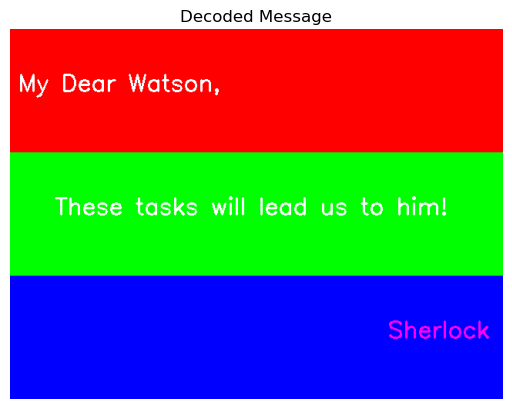

In [ ]:
#Task 1

#a)
import cv2
import numpy as np
import matplotlib.pyplot as plt
     

secret = cv2.imread("_Fall_2025__ROB_GY_6203_HW1/data/for_watson.png", cv2.IMREAD_COLOR)
if secret is None:
    print("Image not loaded. Check the path and filename.")
    exit()

_, thresh = cv2.threshold(secret, 0, 255, cv2.THRESH_BINARY)

plt.imshow(thresh, cmap='gray')
cv2.imwrite('decoded_message.png', thresh)
plt.title('Decoded Message')
plt.axis('off')
plt.show()


In [ ]:
#Task 2
# dimensionality reduction
    
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load Fashion-MNIST dataset
import os
import mnist_reader

# Load training and test data
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

# Convert data to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32) / 255.0
X_test_tensor = torch.tensor(X_test, dtype=torch.float32) / 255.0

# Define a simple autoencoder architecture for unsupervised learning
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 32)  # latent space dimension
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 28*28),
            nn.Sigmoid()  # output pixel intensity normalized
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Create dataset and dataloader
train_dataset = TensorDataset(X_train_tensor, X_train_tensor)  # autoencoder wants input=target
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)

# Instantiate model, loss, optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train autoencoder
num_epochs = 20
for epoch in range(num_epochs):
    total_loss = 0
    for data_in, target in train_loader:
        optimizer.zero_grad()
        output = model(data_in)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data_in.size(0)
    avg_loss = total_loss / len(train_loader.dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# Encode test images to lower dimension
with torch.no_grad():
    encoded_test = model.encoder(X_test_tensor).numpy()

# Use tSNE to reduce encoded features to 2D
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(encoded_test)

# Visualize all the 10,000 images in 2D
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='tab10', s=5)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Visualization of Fashion-MNIST Images after Autoencoding')
plt.xlabel('t-SNE Dim 1')
plt.ylabel('t-SNE Dim 2')
plt.show()

#sources
# 1. https://github.com/Rahulraj31/Autoencoder_MNIST-Fashion/blob/main/MNIST_Autoencoders.ipynb
# 2. https://github.com/najeebuddinm98/vae_fashionmnist/blob/main/VAE_fashionmnist.ipynb

AttributeError: module 'mnist_reader' has no attribute 'load_mnist'

In [1]:
import torch
print(torch.__version__)
print("CUDA available:", torch.cuda.is_available())


2.8.0+cpu
CUDA available: False
